Część podstawowa (1 i 2)

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display, Math, Latex

data = pd.read_csv('fires_thefts.csv', sep=',', names=['f','b'])

x = data['f'].to_numpy(dtype=np.float64)
y = data['b'].to_numpy(dtype=np.float64)

def h(theta, x):
    return theta[0] + theta[1]*x


def J(h, theta, x, y):
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i]) ** 2 for i in range(m))

def costfun(fun, x, y):
    return lambda theta: J(fun, theta, x, y)

def LatexMatrix(matrix):
    ltx = r"\left[\begin{array}"
    m, n = matrix.shape
    ltx += "{" + ("r" * n) + "}"
    for i in range(m):
        ltx += r" & ".join([("%.4f" % j.item()) for j in matrix[i]]) + r" \\\\ "
    ltx += r"\end{array}\right]"
    return ltx



def gradient_descent(h, cost_fun, theta, x, y, alpha, eps):
    current_cost = cost_fun(h, theta, x, y)
    history = [
        [current_cost, theta]
    ]  # zapiszmy wartości kosztu i parametrów, by potem zrobić wykres
    m = len(y)
    while True:
        new_theta = [
            theta[0] - alpha / float(m) * sum(h(theta, x[i]) - y[i] for i in range(m)),
            theta[1]
            - alpha / float(m) * sum((h(theta, x[i]) - y[i]) * x[i] for i in range(m)),
        ]
        theta = new_theta  # jednoczesna aktualizacja - używamy zmiennej tymczasowej
        try:
            prev_cost = current_cost
            current_cost = cost_fun(h, theta, x, y)
        except OverflowError:
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        history.append([current_cost, theta])
    return theta, history



best_theta, history = gradient_descent(h, J, [1.0, 0.0], x, y, alpha=0.001, eps=0.0001)


print(f'Liczba włamań na 50 tys. mieszkańców: {h(best_theta, x=50.)}')
print(f'Liczba włamań na 100 tys. mieszkańców: {h(best_theta, x=100.)}')
print(f'Liczba włamań na 200 tys. mieszkańców: {h(best_theta, x=200.)}')

Liczba włamań na 50 tys. mieszkańców: 83.99730747437142
Liczba włamań na 100 tys. mieszkańców: 151.8748613607417
Liczba włamań na 200 tys. mieszkańców: 287.6299691334823


Część zaawansowana (1)

In [113]:
import time

values = [(0.00001, 0.001), (0.001, 0.01), (0.0001, 0.0001), (0.001, 0.0001)]
cost = []
dur = []


for alpha, eps in values:
    start = time.time()
    best_theta, history = gradient_descent(h, J, [1.0, 0.0], x, y, alpha=alpha, eps=eps)
    stop = time.time()
    duration = stop - start
    dur.append(duration)
    cost.append(history[-1][0])
    display(
        Math(
            r"\large\textrm{Wynik:}\quad \theta = "
            + LatexMatrix(np.matrix(best_theta).reshape(2, 1))
            + (r" \quad J(\theta) = %.4f" % history[-1][0])
            + r" \quad \textrm{po %d iteracjach}" % len(history)
        )
    )
    print(f'{round(duration, 5)} ms')


<IPython.core.display.Math object>

0.12152 ms


<IPython.core.display.Math object>

0.12036 ms


<IPython.core.display.Math object>

3.52597 ms


<IPython.core.display.Math object>

0.5719 ms


Część zaawansowana (2)

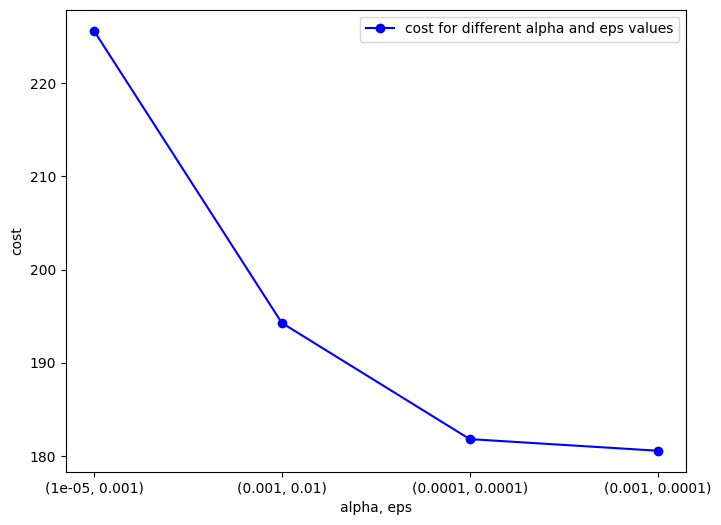

In [114]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,6)
plt.plot([str(i) for i in values], cost,  'bo-', label= 'cost for different alpha and eps values')
plt.legend()
plt.xlabel('alpha, eps')
plt.ylabel('cost')
plt.show()

